#📌 Extracción

In [8]:
import requests

# URL directa al archivo JSON crudo en GitHub (API)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# petición GET para obtener el JSON
response = requests.get(url)
data = response.json()  # Convertimos la respuesta a un objeto Python (lista o diccionario)

print(type(data))  # Para saber si es lista o diccionario
print(len(data))   # Cuántos registros trae (si es lista)

import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()


<class 'list'>
7267


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [9]:

import pandas as pd

df = pd.DataFrame(data)

# Checar tipos en cada columna
for col in df.columns:
    tipos = df[col].apply(lambda x: type(x)).unique()
    print(f"Columna: {col} - Tipos: {tipos}")

Columna: customerID - Tipos: [<class 'str'>]
Columna: Churn - Tipos: [<class 'str'>]
Columna: customer - Tipos: [<class 'dict'>]
Columna: phone - Tipos: [<class 'dict'>]
Columna: internet - Tipos: [<class 'dict'>]
Columna: account - Tipos: [<class 'dict'>]


In [10]:
from pandas import json_normalize
import pandas as pd

# Supongamos ya tienes el df
# Columnas con dicts
cols_dict = ['customer', 'phone', 'internet', 'account']

for col in cols_dict:
    # Normalizamos la columna que contiene diccionarios
    df_normalized = json_normalize(df[col])

    # Le ponemos prefijo para que no haya choque de nombres
    df_normalized = df_normalized.add_prefix(col + '_')

    # Eliminamos la columna original
    df = df.drop(columns=[col])

    # Concatenamos las nuevas columnas normalizadas
    df = pd.concat([df, df_normalized], axis=1)

print(df.head())


   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

#🔧 Transformación

In [14]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


In [16]:
# Categóricas
cols_categoricas = [
    'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod'
]

# 1. Valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# 2. Filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# 3. Valores únicos en columnas categóricas
for col in cols_categoricas:
    print(f"\nValores únicos en {col}:")
    print(df[col].unique())

# 4. Estadísticas para columnas numéricas
print("\nEstadísticas numéricas:")
print(df[['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].describe())


Valores nulos por columna:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

Número de filas duplicadas:
0

Valores únicos en Churn:
['No' 'Yes' '']

Valores únicos en customer_gender:
['Female' 'Male']

Valores únicos en customer_SeniorCitizen:
[0 1]

Valores únicos en customer_Partner:
['Yes' 'No']

Valores únicos en customer_Dependents:
['Yes' 'No']

Valores únicos en phone_Phone

In [18]:
import numpy as np

# 1. Reemplazar valores vacíos en 'Churn' por NaN
df['Churn'] = df['Churn'].replace('', np.nan)

# 2. Eliminar filas donde 'Churn' es NaN
df = df.dropna(subset=['Churn'])

# 3. Convertir cargos a numérico (forzando errores a NaN)
df['account_Charges.Monthly'] = pd.to_numeric(df['account_Charges.Monthly'], errors='coerce')
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# 4. Eliminar filas con NaN en cargos (si hay)
df = df.dropna(subset=['account_Charges.Monthly', 'account_Charges.Total'])

# 5. Normalizar texto en variables categóricas (capitalizar y eliminar espacios)
cols_categoricas = [
    'Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod'
]

for col in cols_categoricas:
    df[col] = df[col].str.strip().str.title()

# 6. Revisar tipos y datos finales
print(df.dtypes)
print("\nValores nulos por columna después de limpieza:")
print(df.isnull().sum())
print("\nDuplicados después de limpieza:", df.duplicated().sum())
print("\nDatos totales después de limpieza:", df.shape)



customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total        float64
dtype: object

Valores nulos por columna después de limpieza:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
custom

In [19]:
# Crear columna de facturación diaria dividiendo la mensual entre 30 días
df['Cuentas_Diarias'] = df['account_Charges.Monthly'] / 30

# Revisar primeras filas para verificar
print(df[['account_Charges.Monthly', 'Cuentas_Diarias']].head())


   account_Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


#📊 Carga y análisis

In [21]:
# Seleccionar solo columnas numéricas
df_num = df.select_dtypes(include='number')

# Calcular estadísticas descriptivas
desc_num = df_num.describe().T

# Agregar mediana
desc_num['median'] = df_num.median()

# Mostrar estadísticas importantes
print(desc_num[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']])


                          count         mean    median          std  \
customer_SeniorCitizen   7032.0     0.162400     0.000     0.368844   
customer_tenure          7032.0    32.421786    29.000    24.545260   
account_Charges.Monthly  7032.0    64.798208    70.350    30.085974   
account_Charges.Total    7032.0  2283.300441  1397.475  2266.771362   
Cuentas_Diarias          7032.0     2.159940     2.345     1.002866   

                               min        25%       50%          75%  \
customer_SeniorCitizen    0.000000    0.00000     0.000     0.000000   
customer_tenure           1.000000    9.00000    29.000    55.000000   
account_Charges.Monthly  18.250000   35.58750    70.350    89.862500   
account_Charges.Total    18.800000  401.45000  1397.475  3794.737500   
Cuentas_Diarias           0.608333    1.18625     2.345     2.995417   

                                 max  
customer_SeniorCitizen      1.000000  
customer_tenure            72.000000  
account_Charges.Monthly

In [22]:
cols_categoricas = [
    'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod'
]

for col in cols_categoricas:
    print(f"\nFrecuencia relativa en {col}:")
    print(df[col].value_counts(normalize=True))



Frecuencia relativa en Churn:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

Frecuencia relativa en customer_gender:
customer_gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64

Frecuencia relativa en customer_SeniorCitizen:
customer_SeniorCitizen
0    0.8376
1    0.1624
Name: proportion, dtype: float64

Frecuencia relativa en customer_Partner:
customer_Partner
No     0.517491
Yes    0.482509
Name: proportion, dtype: float64

Frecuencia relativa en customer_Dependents:
customer_Dependents
No     0.701507
Yes    0.298493
Name: proportion, dtype: float64

Frecuencia relativa en phone_PhoneService:
phone_PhoneService
Yes    0.903299
No     0.096701
Name: proportion, dtype: float64

Frecuencia relativa en phone_MultipleLines:
phone_MultipleLines
No                  0.481371
Yes                 0.421928
No Phone Service    0.096701
Name: proportion, dtype: float64

Frecuencia relativa en internet_InternetService:
internet_InternetService


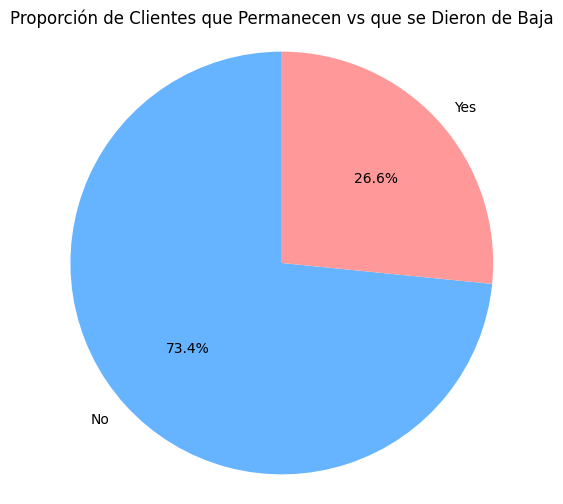

In [24]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporción de Clientes que Permanecen vs que se Dieron de Baja')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()


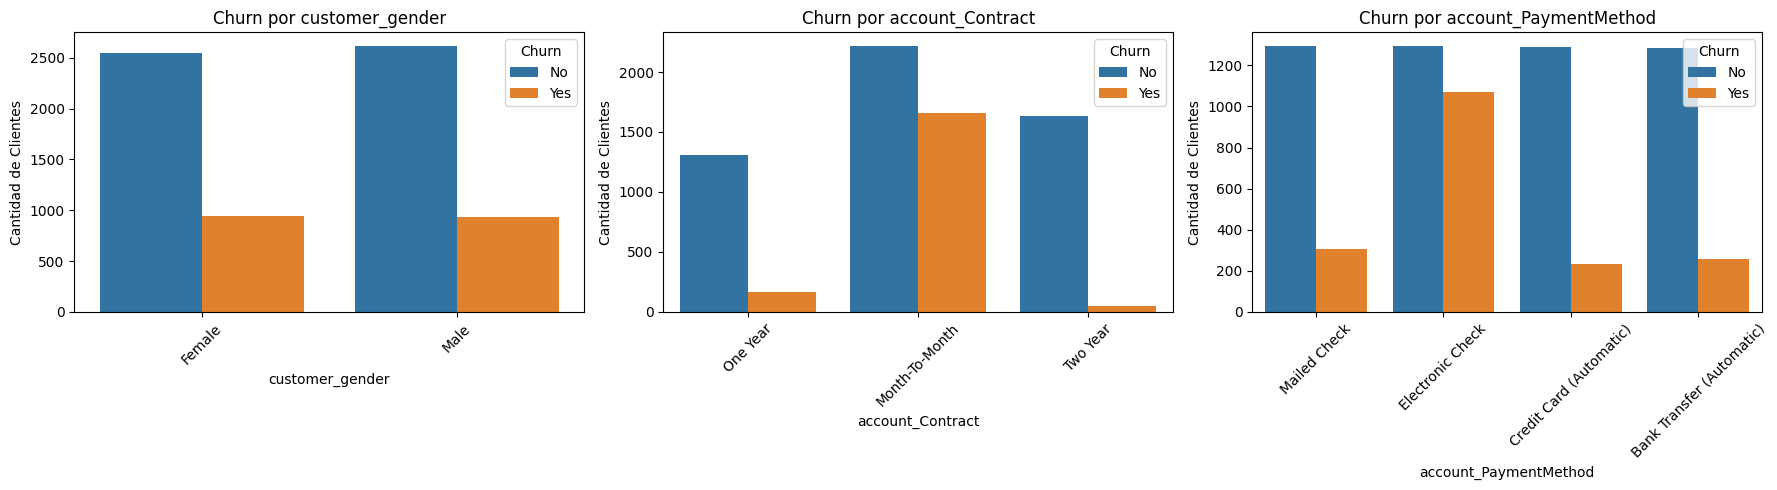

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas de interés
vars_categoricas = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

# Ajustar tamaño de figura para varias gráficas
plt.figure(figsize=(18, 5))

for i, col in enumerate(vars_categoricas, 1):
    plt.subplot(1, len(vars_categoricas), i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


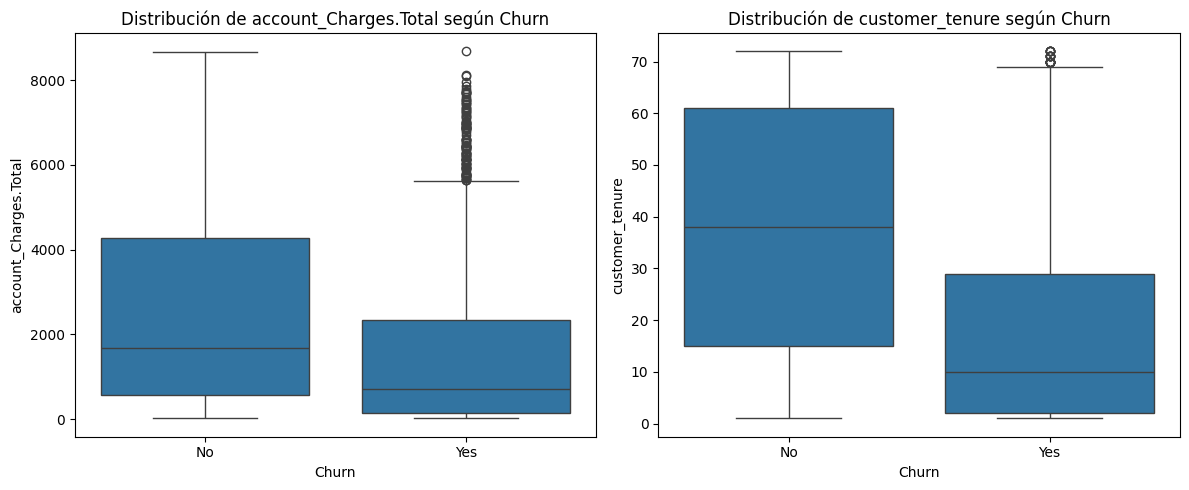

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas a analizar
vars_numericas = ['account_Charges.Total', 'customer_tenure']

plt.figure(figsize=(12,5))

for i, col in enumerate(vars_numericas, 1):
    plt.subplot(1, len(vars_numericas), i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


#📄Informe final

In [27]:
total_clientes = len(df)
clientes_churn = df['Churn'].value_counts().get('Yes', 0)
porcentaje_churn = (clientes_churn / total_clientes) * 100

print(f"La evasión representa aproximadamente {porcentaje_churn:.2f}% del total de clientes.")


La evasión representa aproximadamente 26.58% del total de clientes.


### Introducción

El objetivo de este análisis es entender el fenómeno de evasión de clientes (Churn) en Telecom X.  
Se busca identificar patrones y factores asociados a la cancelación del servicio para apoyar la toma de decisiones estratégicas que ayuden a reducir la pérdida de clientes.

### Limpieza y Tratamiento de Datos

- Se importaron datos desde la API proporcionada en formato JSON.
- Se transformaron las columnas anidadas para obtener un DataFrame plano y manejable.
- Se detectaron y corrigieron inconsistencias como valores vacíos en la variable `Churn`.
- Se convirtieron las columnas de cargos a tipo numérico y se eliminaron filas con valores no válidos.
- Se estandarizaron variables categóricas (por ejemplo, convertir "Yes"/"No" a 1/0).
- Se creó la columna `Cuentas_Diarias` para analizar facturación diaria.

### Análisis Exploratorio de Datos

- Se analizaron estadísticas descriptivas de las variables numéricas y categóricas.
- Se visualizó la distribución de evasión (`Churn`) con gráficos de barras y pastel.
- Se exploró la evasión según variables categóricas como género, tipo de contrato y método de pago.
- Se compararon variables numéricas (total gastado, tiempo de contrato) entre clientes que se quedaron y los que cancelaron, usando boxplots.

### Conclusiones e Insights

- Se identificó que la evasión representa aproximadamente 26.58% del total de clientes.
- Clientes con contratos "Month-to-month" muestran mayor tasa de evasión.
- Ciertos métodos de pago están asociados con mayor o menor retención.
- La facturación total y el tiempo de contrato presentan diferencias claras entre grupos que se quedaron y se fueron.
- Estos hallazgos sugieren perfiles de clientes con riesgo alto de evasión.

### Recomendaciones

- Fomentar contratos a más largo plazo para mejorar la retención.
- Incentivar métodos de pago automáticos y digitales que muestran mejor retención.
- Desarrollar campañas de fidelización para clientes con alta facturación y corto tiempo de contrato.
- Implementar alertas tempranas para clientes en riesgo basado en su perfil de consumo y tipo de contrato.
